# Image Processing

Reference : <a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html">OpenCV Image Processing</a>

## Import

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read the Image

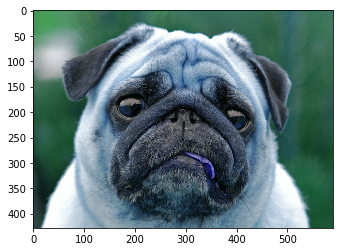

In [2]:
# imread final parameter : 
## 0 : Grayscale ; 1 : Colorscale ; -1 : Unchanged
img = cv2.imread('./img/dog.jpg',1)
plt.imshow(img)

## Image Processing in opencv

<ul>
    <li>Changing Color space</li>
    <li>Image thresholding</li>
    <li>Geometric Transformations of Images</li>
    <li>Smoothing Images</li>
    <li>Morphological Transformations</li>
</ul>

<h3 style="color:red">Changing Colorspace </h3>

Use **cvtColor()** to change the colorspace. 

There are thousands of colorspace can be choosed, here just use grayscale and hsvscale as example.

(428, 590)


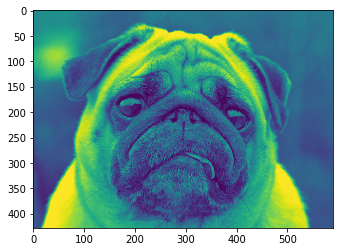

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
print(gray.shape)

(428, 590, 3)


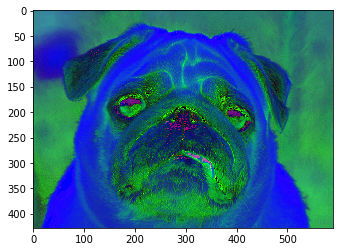

In [4]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
print(hsv.shape)

#### Hint : How to find HSV values(the color you want) to track? 

In [5]:
def BGR2HSV_color(BGR):
    color = np.uint8([[BGR]])
    hsv_color = cv2.cvtColor(color,cv2.COLOR_BGR2HSV)
    return hsv_color[0][0]

#### Object tracking

* take the image
* Convert from BGR to HSV color-space
* Threshold the HSV image for a range of specific color
* Extract the specific color object alone, we can do whatever on that image we want.

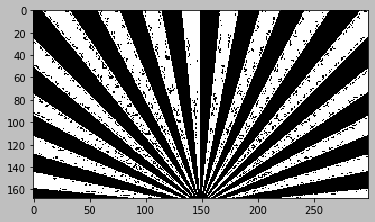

In [6]:
import cv2
import numpy as np

# got the color unchanged image
img = cv2.imread('./img/flag.png',1)

# transform the image from BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define range of "green color"
lower_red = np.array([-10,100,100])
upper_red = np.array([10,255,255]) 

# Threshold the HSV image to get only green colors
mask_red = cv2.inRange(hsv,lower_red,upper_red)

# Bitwise-AND mask and original image
res_red = cv2.bitwise_and(hsv,hsv, mask= mask_red)

plt.style.use('grayscale')
plt.imshow(res_red)
plt.imshow(mask_red)
#plt.imshow(img)

<h3 style="color:red">Image thresholding</h3>

Here will show 3 ways to amke a example of **Image Thresholding**

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

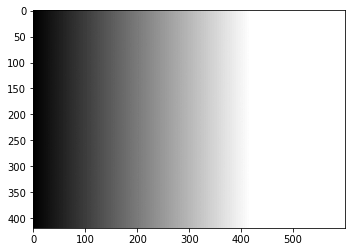

In [8]:
img = cv2.imread('./img/gradient.jpg',0)
plt.imshow(img)

#### Simple thresholding

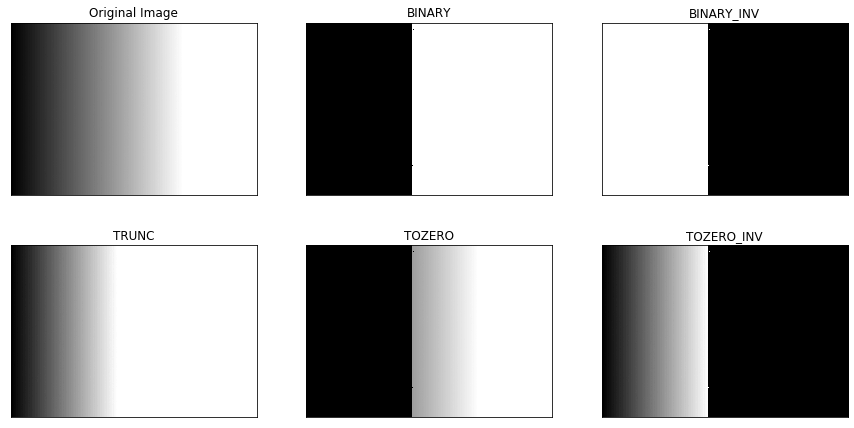

In [9]:
# 1st argument : image file
# 2nd argument : the threshold value which is used to classify the pixel values - low
# 3st argument : the threshold value which is used to classify the pixel values - high
# 4th argument : tyles of thresholding you want to use

ret,thresh1 = cv2.threshold(img,157,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,157,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,157,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,157,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,157,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15,7.5))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

#### Adaptive thresholding

In the previous section, we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions in different areas.In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

<b>Adaptive thresh mean & Adaptive thresh gassian</b><br>
<b>Second last</b> : Block Size - It decides the size of neighbourhood area.<br>
<b>First last</b>  : C - It is just a constant which is subtracted from the mean or weighted mean calculated.<br>

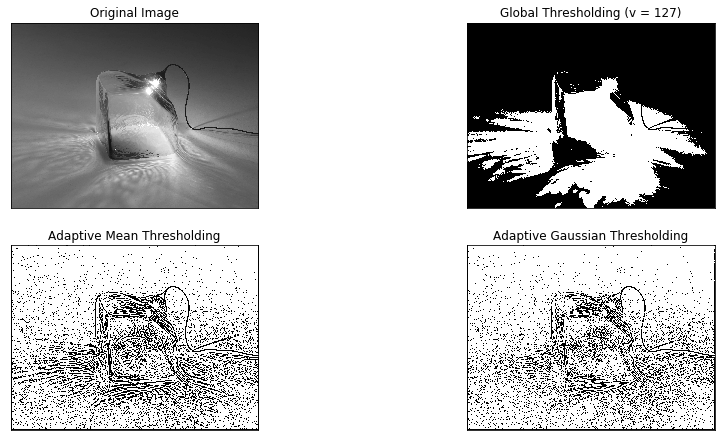

In [11]:
img = cv2.imread('./img/lamp.jpg',0)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# ADAPTIVE_THRESH_MEAN_C
## threshold value is the mean of neighbourhood area
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,31,2)

# ADAPTIVE_THRESH_GAUSSIAN_C
## threshold value is the weighted sum of neighbourhood values where weights are a gaussian window
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,31,2)

titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(15,7.5))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


#### Otsu’s Binarization

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./img/noisy2.png',0)

In first case, I applied global thresholding for a value of 127. <br>
In second case, I applied Otsu’s thresholding directly.<br>
In third case, I filtered image with a 5x5 gaussian kernel to remove the noise, then applied Otsu thresholding.

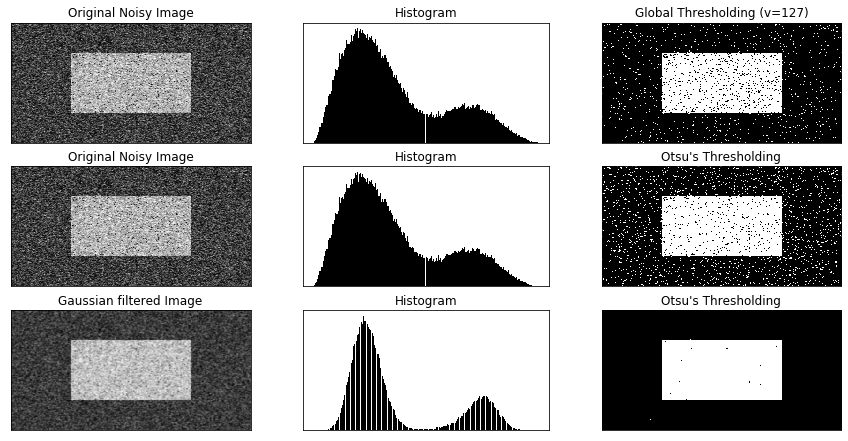

In [13]:
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=(15,7.5))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

<h3 style="color:red">Geometric Transformations of Images</h3>

#### Scaling (Resize)

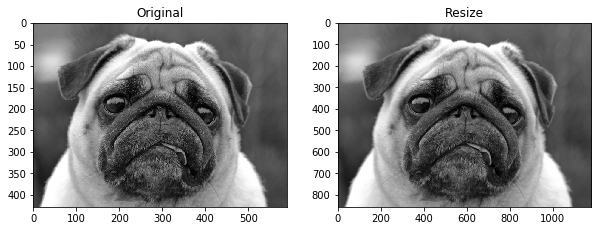

In [14]:
img = cv2.imread('./img/dog.jpg',0)
height, width = img.shape
res = cv2.resize(img, (2*width,2*height))

plt.figure(figsize=(10,6))

plt.subplot(1,2,1), plt.imshow(img,'gray')
plt.title("Original")
plt.subplot(1,2,2), plt.imshow(res,'gray')
plt.title("Resize")

plt.show()

#### Translation

Translation is the shifting of object’s location. If you know the shift in (x,y) direction, let it be (t_x,t_y), you can create the transformation matrix <b>M</b> as follows

![](https://i.imgur.com/fliH8Qx.png)

You can take make it into a Numpy array of type <b>np.float32</b> and pass it into <b>cv2.warpAffine()</b> function.

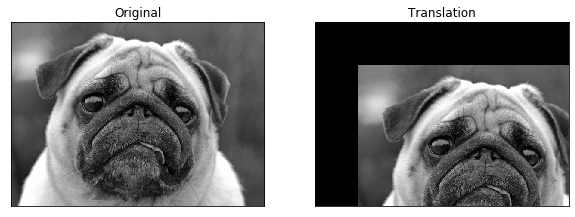

In [15]:
img = cv2.imread('./img/dog.jpg',0)

rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,100]])
trs = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(10,6))

plt.subplot(1,2,1), plt.imshow(img,'gray')
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(trs,'gray')
plt.title("Translation"), plt.xticks([]), plt.yticks([])

plt.show()

#### Rotation

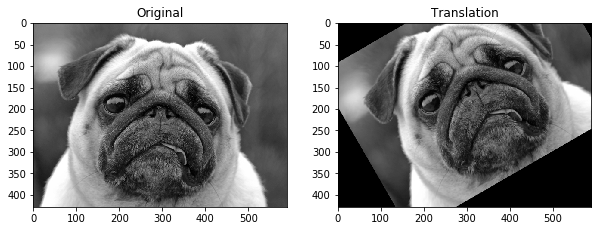

In [16]:
img = cv2.imread('./img/dog.jpg',0)
rows,cols = img.shape

# 1st : rotation center
# 2nd : angle you want to turn
# 3rd : scale you want to change ( 1: not change )
M = cv2.getRotationMatrix2D((cols/3,rows/3),30,1)
dst = cv2.warpAffine(img,M,(cols,rows))
 
plt.figure(figsize=(10,6))

plt.subplot(1,2,1), plt.imshow(img,'gray')
plt.title("Original")
plt.subplot(1,2,2), plt.imshow(dst,'gray')
plt.title("Translation")

plt.show()

#### Affine Transformation

getAffineTransform()透過變換前後三個點來得到目標矩陣

![](https://i.imgur.com/IazE9qH.png)

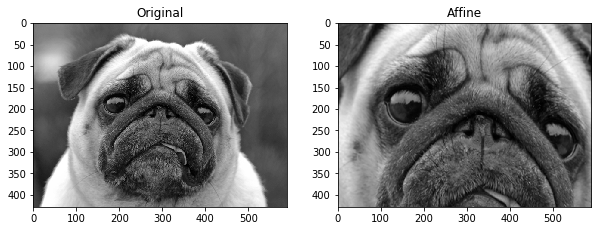

In [17]:
img = cv2.imread("./img/dog.jpg",0)
rows,cols = img.shape

pts1 = np.float32([[100,100],[100,400],[450,150]])
pts2 = np.float32([[0,0],[0,600],[600,150]])

M = cv2.getAffineTransform(pts1,pts2)
aff = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(10,6))

plt.subplot(1,2,1), plt.imshow(img,'gray')
plt.title("Original")
plt.subplot(1,2,2), plt.imshow(aff,'gray')
plt.title("Affine")

plt.show()

#### Perspective Transformation

getPerspectiveTransform()透過變換前後 4 個點來得到目標矩陣<br>
To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. 

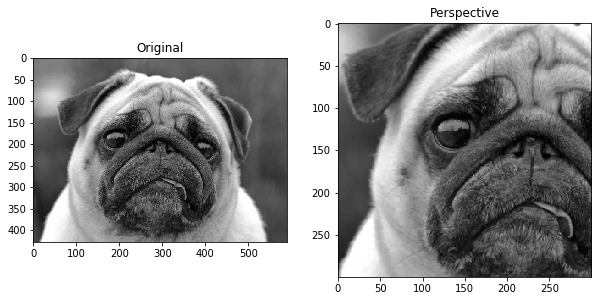

In [18]:
img = cv2.imread('./img/dog.jpg',0)
rows,col = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

pre = cv2.warpPerspective(img,M,(300,300))

plt.figure(figsize=(10,6))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(pre),plt.title('Perspective')
plt.show()

<h3 style="color:red">Smoothing Images</h3>

#### 2D Convolution ( Image Filtering )

Reference : <a href="http://www.songho.ca/dsp/convolution/convolution2d_example.html">2D Convolution</a>

濾波(filtering)是影像處理的一個基本操作，目的在選擇性的提取重要訊息，用在影像銳化、去除雜訊或提取感興趣的視覺特徵，這類處理需尋訪影像每個像素，從此像素和相鄰像素得到新的像素值。

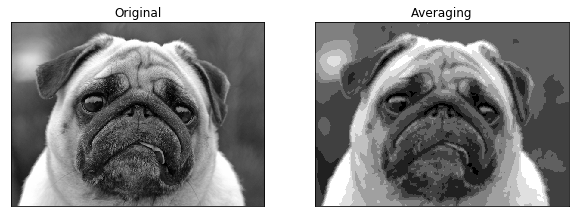

In [19]:
img = cv2.imread('./img/dog.jpg',0)

filter_kernal = np.ones((5,5),np.float32)/800
dst = cv2.filter2D(img,-1,filter_kernal)

plt.figure(figsize=(10,6))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

#### Image Blurring (Image Smoothing) 均值滤波

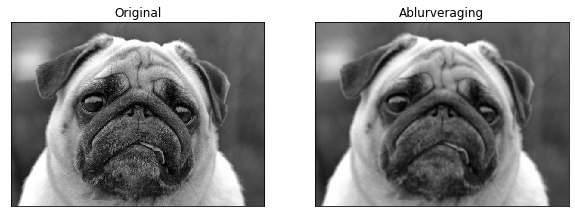

In [20]:
img = cv2.imread('./img/dog.jpg',0)

blur = cv2.blur(img, (5,5))

plt.figure(figsize=(10,6))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Ablurveraging')
plt.xticks([]), plt.yticks([])
plt.show()

#### Gaussian Filtering

 <b>1st element</b><br>
 We should specify the width and height of the kernel which should be positive and odd.<br>
 <b>2nd element</b><br>
 We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively.<br>
 If only sigmaX is specified, sigmaY is taken as equal to sigmaX. If both are given as zeros, they are calculated from the kernel size.

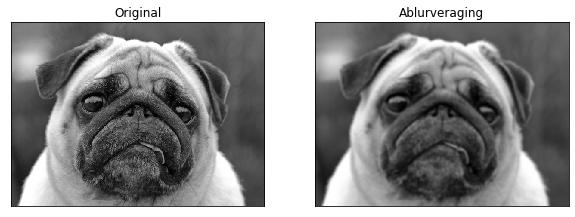

In [21]:
img = cv2.imread('./img/dog.jpg',0)

blur = cv2.GaussianBlur(img,(11,11),0)

plt.figure(figsize=(10,6))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Ablurveraging')
plt.xticks([]), plt.yticks([])
plt.show()

#### Median Filtering

This is highly effective in removing noise.<br> 
One interesting thing to note is that, in the Gaussian and box filters, the filtered value for the central element can be a value which may not exist in the original image.<br>
However this is not the case in median filtering, since the central element is always replaced by some pixel value in the image.<br> This reduces the noise effectively. The kernel size must be a positive odd integer

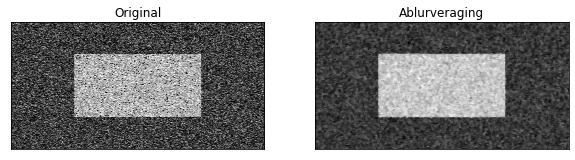

In [22]:
img = cv2.imread('./img/noisy2.png',0)

# In this demo, we add a 50% noise to our original image and use a median filter.
blur = cv2.medianBlur(img,5)

plt.figure(figsize=(10,6))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Ablurveraging')
plt.xticks([]), plt.yticks([])
plt.show()

#### Bilateral Filtering

該濾波器可以在保證邊界清晰的情況下有效的去掉噪聲。它的構造比較複雜，即考慮了圖像的空間關係，也考慮圖像的灰度關係<br>雙邊濾波同時使用了空間高斯權重和灰度相似性高斯權重，確保了邊界不會被模糊掉。

Reference : <a href="https://blog.csdn.net/on2way/article/details/46828567">Bilateral Filtering & Median Filtering</a>

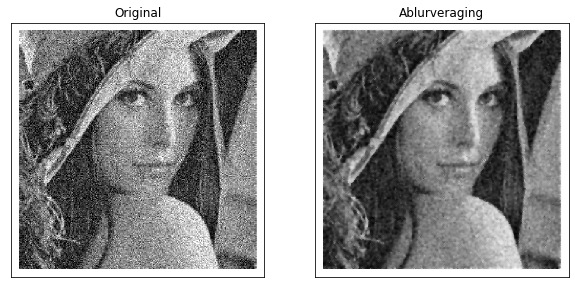

In [23]:
img = cv2.imread('./img/noisy.png',0)

# (img,d,’p1’,’p2’)函数有四个参数需要，d是领域的直径，后面两个参数是空间高斯函数标准差和灰度值相似性高斯函数标准差
blur = cv2.bilateralFilter(img,9,75,75)

plt.figure(figsize=(10,6))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Ablurveraging')
plt.xticks([]), plt.yticks([])
plt.show()

<h3 style="color:red">Morphological Transformations</h3>

#### Erosion

The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

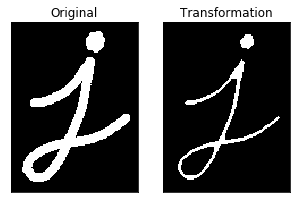

In [24]:
img = cv2.imread('./img/word_i.png')

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

plt.figure(figsize=(5,7))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Transformation')
plt.xticks([]), plt.yticks([])
plt.show()

#### Dilation

It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. 

Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. 

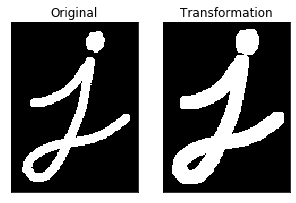

In [25]:
img = cv2.imread('./img/word_i.png')

kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)

plt.figure(figsize=(5,7))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation),plt.title('Transformation')
plt.xticks([]), plt.yticks([])
plt.show()

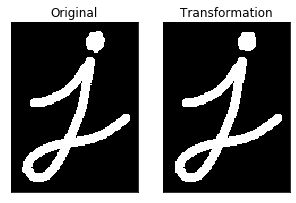

In [26]:
img = cv2.imread('./img/word_i.png')

# use erosion first, and then use dilation
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(erosion,kernel,iterations = 1)

plt.figure(figsize=(5,7))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation),plt.title('Transformation')
plt.xticks([]), plt.yticks([])
plt.show()

#### Opening

Opening is just another name of **erosion followed by dilation**. It is useful in removing noise, as we explained above.

#### Closing

Closing is reverse of Opening, **Dilation followed by Erosion**. It is useful in closing small holes inside the foreground objects, or small black points on the object.

#### Morphological Gradient

#### Top Hat

#### Black Hat